# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


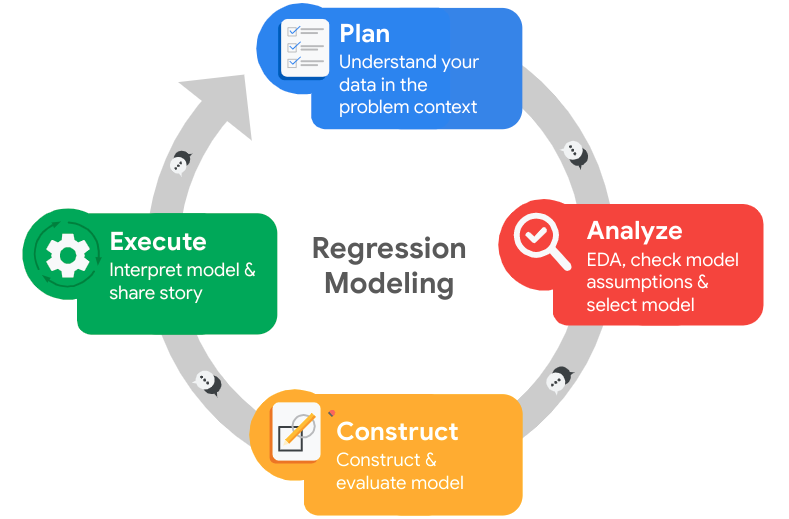

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders are management and people above management and what the data reveals about how work is being conducted. 

We are trying to achieve insights into the data collected. 

Ethical considerations are the potential of being overworked and how to fairly represent that in the findings.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [78]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

#Displaying results
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.metrics import accuracy_score, auc, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix,\
ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import check_cv, cross_validate, GridSearchCV, train_test_split
from sklearn.tree import BaseDecisionTree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

#Saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

### Gather descriptive statistics about the data

In [16]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [17]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
# Rename columns as needed
### YOUR CODE HERE ###
df1 = df0.rename(columns={"average_montly_hours": "average_monthly_hours",
                         "Work_accident": "work_accident",
                         "time_spend_company": "tenure",
                         "Department": "department"})

# Display all column names after the update
### YOUR CODE HERE ###
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [25]:
# Check for missing values
### YOUR CODE HERE ###
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [26]:
# Check for duplicates
### YOUR CODE HERE ###
df1.duplicated().sum()

3008

In [27]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df1[df1.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df1.drop_duplicates(keep="first")

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

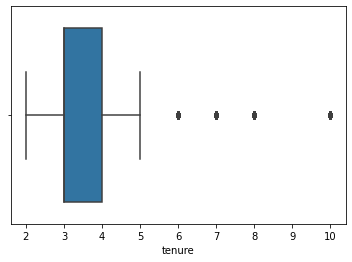

In [6]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(data=df1, x="tenure", orient="width")

In [5]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

percentile25 = df1["tenure"].quantile(0.25)
percentile75 = df1["tenure"].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit is :" + str(upper_limit))
print("Upper limit is :" + str(lower_limit))
outliers = df1[(df1["tenure"] > upper_limit) | (df1["tenure"] < lower_limit)]


print("Amount of outliers is " + str(len(outliers)))

Upper limit is :5.5
Upper limit is :1.5
Amount of outliers is 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [8]:
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1["left"].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

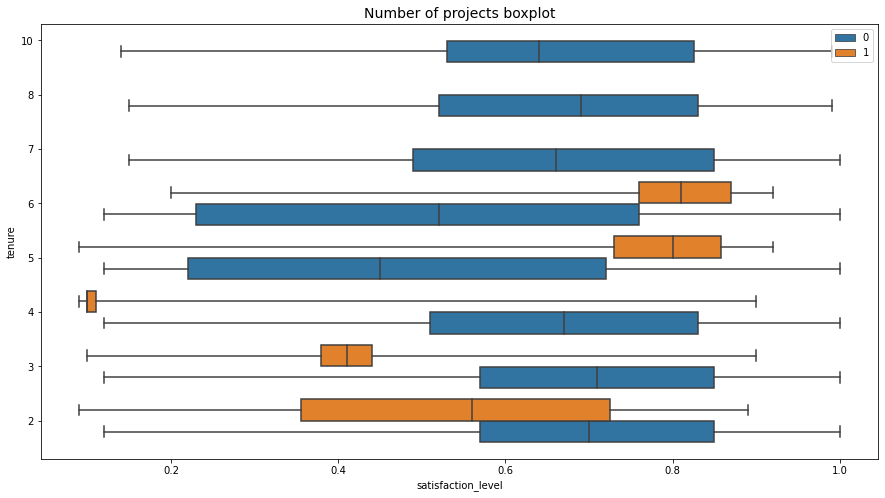

In [11]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=df1, y="tenure", x="satisfaction_level", orient="h", hue="left", ax=ax, whis=(0, 100))
ax.set_title('Number of projects boxplot', fontsize='14')
ax.legend(loc="upper right")
ax.invert_yaxis()
ax.margins(y=0)
plt.show()

Text(0.5, 1.0, 'Long-tenured people')

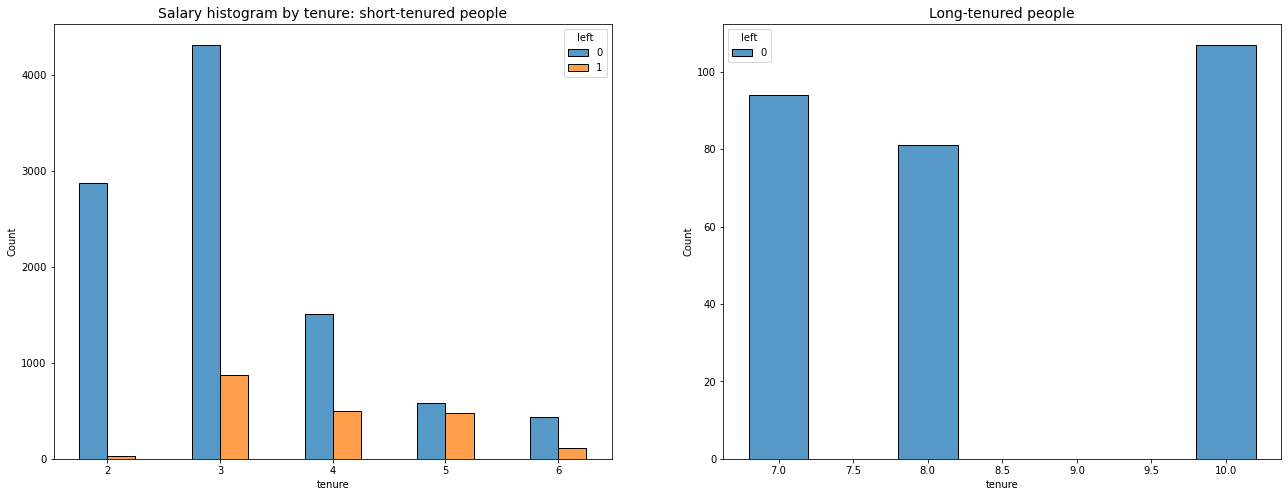

In [19]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', discrete=1, multiple='dodge', shrink=.5, hue="left", ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', discrete=1, multiple='dodge', hue="left", shrink=.4, ax=ax[1])
ax[1].set_title('Long-tenured people', fontsize='14')

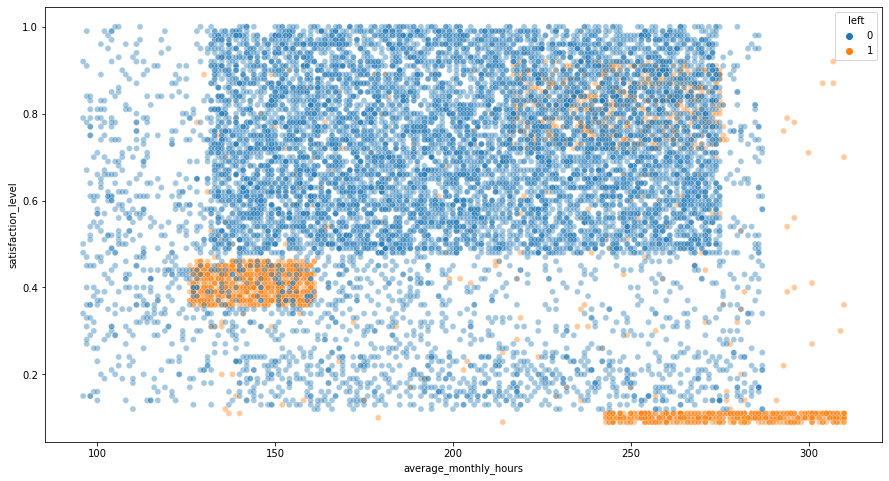

In [92]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df1, y="satisfaction_level", x="average_monthly_hours", hue="left")


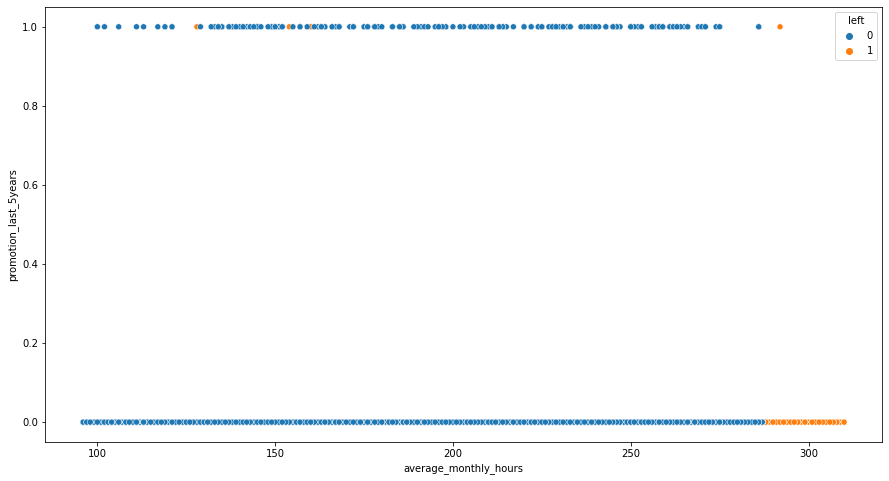

In [9]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=df1, y="promotion_last_5years", x="average_monthly_hours", hue="left")

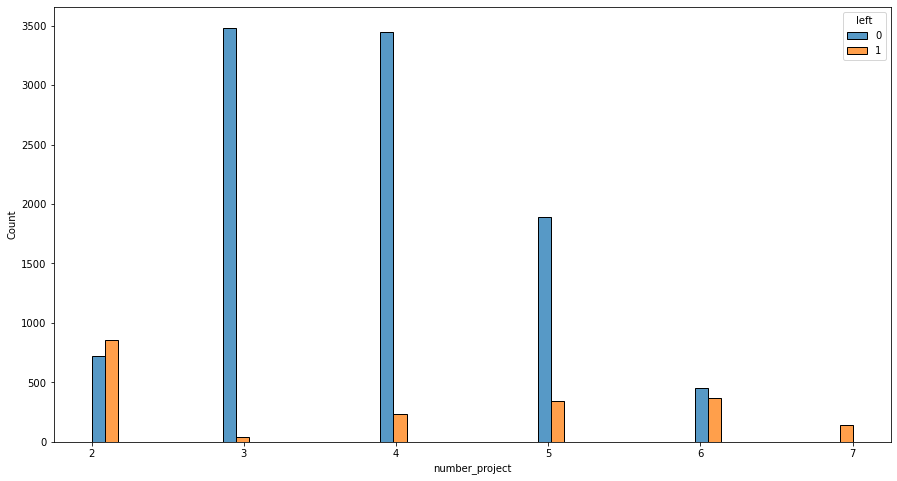

In [87]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=df1, x="number_project", hue="left", multiple="dodge", ax=ax)

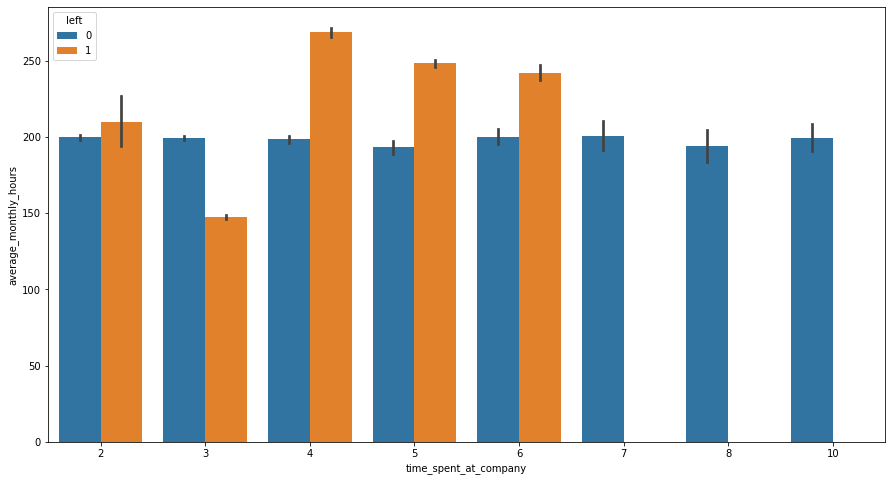

In [166]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=df1, y="average_monthly_hours", x="time_spent_at_company", hue="left")

Text(0.5, 1.0, 'Salary histogram by tenure: long-tenured people')

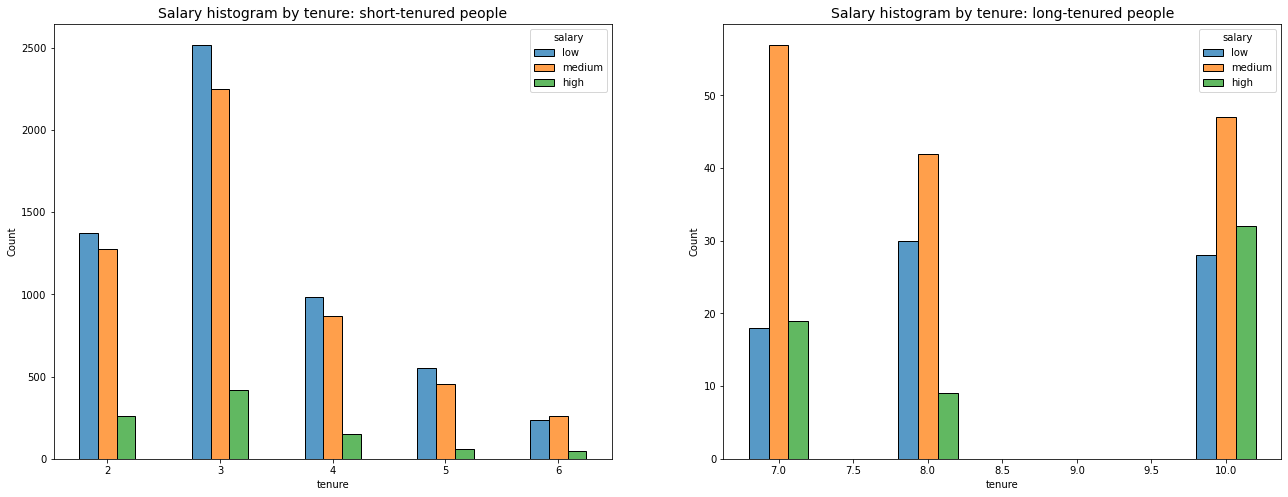

In [6]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')

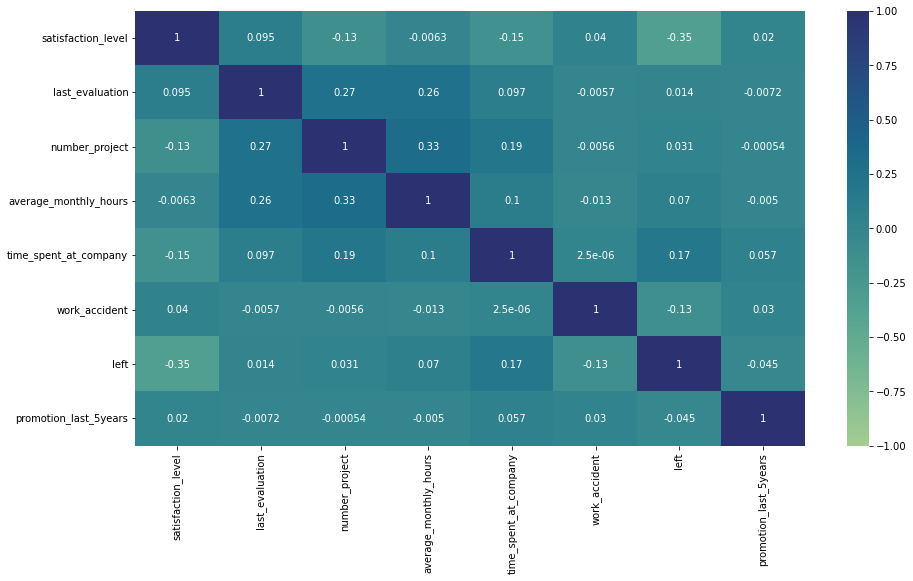

In [13]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data=df1.corr(), annot=True, cmap="crest", vmin=1, vmax=-1)

### Insights

There seems to be a correlation with short-term employees with lower salaries and staying shorter amounts of time, and medium salaries and longer amounts of time. This could be due to managment and incentives to work. There is also a high correlation with how many hours in a month are being done and satisfaction levels at the company. Number of projects at 3 or 4 has the lowest amount of people leaving which may indicate the appropriate project number levels. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In the scatterplot there were boxed areas which may indicate tampering. Independent variables chosen were satisfaction levels for its large inherent affect on all facets of employment, average monthly hours for its clear distinction of how many hours most workplaces have and its correlation to leaving or not, tenure for showing where there could be differences in management and its affect on satisfaction and finally projects per week for its insights into how many were optimal before leaving. 

This data fits the assumptions made in the planning phase of this project. 

It could be improved with more feature engineering and abstractions of data from current categories and finding out about the clear duplicates. At this stage the findings may have been tampered with with its showing of a clear high satisfaction with high tenure as well being an area of interest. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The aim of the predictions is to find whether an employee will leave or stay and some of the reasons for doing so. Since this is a left or not, this would work with binary classification approach. 

### Identify the types of models most appropriate for this task.

### Model A: Logistic Regression

Logistic Regression due to the purpose of the data analysis being a categorial outcome of left or not and a probability of this occuring. Tree based learning would work well as well with the data.

The model would be a binomial one due to leaving being a 0 or 1. 

The parts of the model that are do not fit this model are the salary and departments. This can be overcome through converting these to ordinal categories. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [7]:
### YOUR CODE HERE ###
#Creating the encoded variables for a confusion matrix to reveal a closer look at the model

#Duplicating the pandas dataframe
df_enc = df1.copy()

#Encoding the salary column to an ordinal numeric option
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

#Encode the department column
df_enc = pd.get_dummies(df_enc, drop_first=False)

#Show the dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


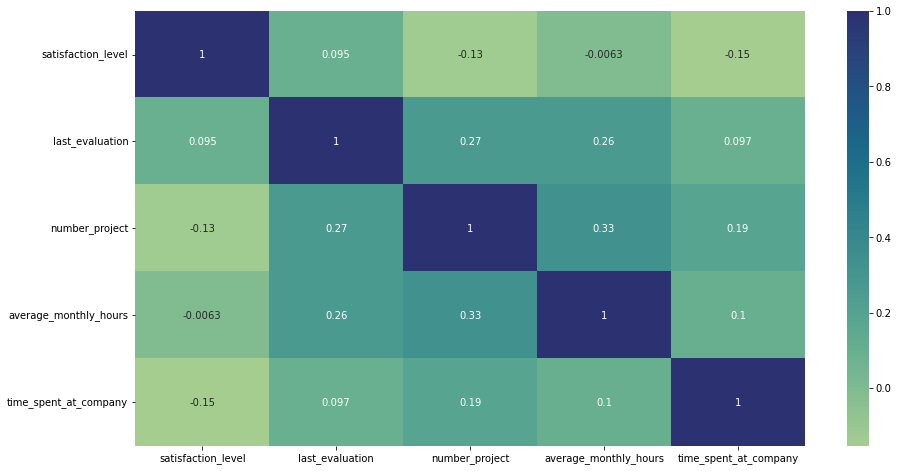

In [10]:
#Creating a heamap to find out how related the variables are
plt.subplots(figsize=(15, 8))

sns.heatmap(data=df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spent_at_company']].corr(), annot=True, cmap="crest")
plt.show()

In [13]:
#Look for outliers in the data
pd.crosstab(columns=df1["department"], index=df1["left"])

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,818,609,512,488,384,561,576,2689,1509,1854
1,158,85,109,113,52,112,110,550,312,390


In [9]:
#Removing outliers from the tenure column based on previous graphs above
df_logreg = df_enc[(df_enc["tenure"] <= upper_limit) | (df_enc["tenure"] >= lower_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
#Creating the x and y variables for training the model.
y = df_logreg["left"]

X = df_logreg.drop(columns="left", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [16]:
#Create the logistic regression model and fit it to the training data
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [17]:
#Predict against the test set
y_pred = log_clf.predict(X_test)

To test this a confusion matrix will be made

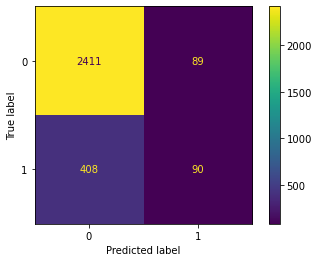

In [100]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,  display_labels=log_clf.classes_)
log_disp.plot(values_format='')

In [21]:
#Showing the results of the logistic regression model in percentages
target_names = ["Predictions would stay", "Predictions would leave"]
print(classification_report(y_test, y_pred, target_names=target_names))

                         precision    recall  f1-score   support

 Predictions would stay       0.86      0.96      0.91      2500
Predictions would leave       0.50      0.18      0.27       498

               accuracy                           0.83      2998
              macro avg       0.68      0.57      0.59      2998
           weighted avg       0.80      0.83      0.80      2998



### Modelling Approach B: Tree based modelling

In [22]:
#Creating the model varibles to test against
y = df_enc["left"]

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [11]:
#The features to train against
X = df_enc.drop(columns="left", axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
#Splitting the data to test against in the final stages of modelling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [13]:
#Put the model into a pandas dataframe to categorize data
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table


def get_score(model_name, model, X_test_data, y_test_data):
    """
    Get the scores of metrics in data-frame.
    To test against other models.
    """
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

### Tree based modelling: Decision Tree

In [14]:
#Instantiating the tree object
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

#Parameters to train over
scoring = {"accuracy", "f1", "precision", "recall", "roc_auc"}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [83]:
#Fitting the model to training data
tree1.fit(X_train, y_train)

tree1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
#The best params for the fitting of these points
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [29]:
#The models best score compared to multiple other measurements
tree1.best_score_

0.9758877392438816

In [31]:
#The results put into the different statistical measurements
make_results("decision_tree_roc", tree1, "auc")

,model,precision,recall,F1,accuracy,auc
0,decision_tree_roc,0.966878,0.918288,0.941941,0.981208,0.975888


In [96]:
get_score("decision_tree_roc", tree1, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,decision_tree_roc,0.974684,0.927711,0.950617,0.983989,0.961455


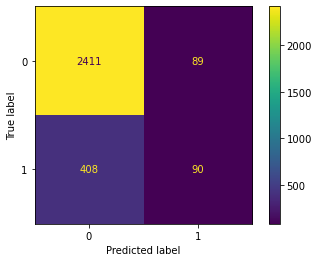

In [99]:
decision_tree_auc = confusion_matrix(y_test, y_pred, labels=tree1.classes_)

decision_tree_auc_disp = ConfusionMatrixDisplay(confusion_matrix=decision_tree_roc,  display_labels=tree1.classes_)
decision_tree_auc_disp.plot(values_format='')

### Tree based modelling: Random Forest

In [104]:
#Instantiating the tree object
tree1 = RandomForestClassifier(random_state=0)

In [15]:
#Instantiating parameters for first random forest

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

rf1 = GridSearchCV(tree1, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [106]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 39s, sys: 1.17 s, total: 9min 41s
Wall time: 9min 41s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [57]:
#Pickle the results to be used later
def write_pickle(pickle_address, model):
    """
    In:     Pickle address and filename to save model.
    """
    
    with open(pickle_address + ".pickle", "w+b") as pickle_dump:
        pickle.dump(model, pickle_dump)
        
write_pickle("tree1_rf", rf1)

#Pickle the results to be used later
def read_pickle(pickle_address):
    """
    In:     Pickle address and filename to save model.
    
    Out:    Pickle file returned.
    """
    
    with open(pickle_address + ".pickle", "r+b") as pickle_read:
        pickled_file = pickle.load(pickle_read)
        
    return pickled_file

rf1 = read_pickle("tree1_rf")

In [52]:
# Check best AUC score on CV
rf1.best_score_

0.9820293639756658

In [51]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [80]:
make_results("rf1", rf1, "auc")

,model,precision,recall,F1,accuracy,auc
0,rf1,0.945895,0.912254,0.928698,0.97676,0.982029


In [97]:
get_score("rf1", rf1, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,rf1,0.960499,0.927711,0.94382,0.981654,0.960055


###Feature Engineering.

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours. 

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models. 

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

Before this, Principle Component Analysis will be performed to test variance between variables.

In [110]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
#The feature selection
features = [
    "number_project",
    "average_monthly_hours",
    "last_evaluation",
    "work_accident",
    "promotion_last_5years"
]

In [143]:
#The functions to reveal Principal Component Analysis
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    X_pca = pd.DataFrame(X_pca, columns=features)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [134]:
#Showing the features most likely to be correlated
print("Correlation with SalePrice:\n")
print(df_enc[features].corrwith(df_enc.satisfaction_level))

Correlation with SalePrice:

number_project          -0.133246
average_monthly_hours   -0.006252
last_evaluation          0.095186
work_accident            0.039940
promotion_last_5years    0.019789
dtype: float64


In [136]:
X_pca = df_enc.copy()
y_pca = X_pca.pop("satisfaction_level")
X_pca = X_pca.loc[:, features]

# applying pca
pca, X_pcas, loadings = apply_pca(X_pca)
print(loadings)

                       number_project  average_monthly_hours  last_evaluation  \
number_project               0.593198               0.029085        -0.000338   
average_monthly_hours        0.590113               0.006078         0.006737   
last_evaluation              0.546875               0.011796        -0.021515   
work_accident               -0.024934               0.705249        -0.708264   
promotion_last_5years       -0.013704               0.708239         0.705588   

                       work_accident  promotion_last_5years  
number_project              0.359015               0.719985  
average_monthly_hours       0.414138              -0.692946  
last_evaluation            -0.836159              -0.034115  
work_accident               0.012457              -0.014490  
promotion_last_5years      -0.016775              -0.008624  




The results from Principal Component Analysis indicates quite strongly that the number_project and promotion_last_5years is the closest related outside of work accident and last evaluation with a score of 0.71, which we can ignore. The next being promotion_last_5years and average_monthly_hours with 0.70.

These show they are highly related statistics and will be looked into with feature engineering and removing more outliers. 

Next will be continuing with the feature engineering for revealing more accurate insights.


In [38]:
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
df2["over_worked"] = df2["average_monthly_hours"]
max_worked = df2["over_worked"].max()
min_worked = df2["over_worked"].min()
print(f"Maximum hours worked was {max_worked}.")
print(f"Minimum hours worked was {min_worked}.")

Maximum hours worked was 310.
Minimum hours worked was 96.


In [40]:
# Define `overworked` as working > 175 hrs/week
df2['over_worked'] = (df2['over_worked'] > 175).astype(int)

# Display first few rows of new column
df2['over_worked'].head()

0    0
1    1
2    1
3    1
4    0
Name: over_worked, dtype: int64

In [41]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,over_worked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
#Selecting the correct x and y variables
y = df2["left"]
X = df2.drop('left', axis=1)

In [43]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [44]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [45]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [46]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.29 s, sys: 18.3 ms, total: 2.31 s
Wall time: 2.31 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [47]:
#The best shown parameters
tree2.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
#The best score according to the model
tree2.best_score_

0.9586752505340426

In [50]:
#Putting into a data-frame and returning the highest scores in all categories
make_results("tree2", tree2, "auc")

,model,precision,recall,F1,accuracy,auc
0,tree2,0.856693,0.903553,0.878882,0.958523,0.958675


In [51]:
get_score("tree2", tree2, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,tree2,0.783877,0.917671,0.845513,0.944296,0.933635


### Tree based modelling: Random Forest round 2.

In [65]:
tree3 = RandomForestClassifier(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#Instantiating parameters for second random forest

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

rf2 = GridSearchCV(tree3, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [53]:
%%time
#Fitting the data to the points
rf2.fit(X_train, y_train)

CPU times: user 7min 4s, sys: 1.03 s, total: 7min 5s
Wall time: 7min 6s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [58]:
#Saving the pickled data
write_pickle("tree2_rf", rf2)

In [68]:
rf2 = read_pickle('tree2_rf')

In [69]:
rf2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [70]:
rf2.best_score_

0.9648100662833985

In [71]:
make_results("rf2", rf2, "auc")

,model,precision,recall,F1,accuracy,auc
0,rf2,0.866758,0.878754,0.872407,0.957411,0.96481


In [72]:
get_score("rf2", rf2, X_test, y_test)

,model,precision,recall,f1,accuracy,AUC
0,rf2,0.870406,0.903614,0.8867,0.961641,0.938407


In [73]:
#Fitting the data to the y prediction values

preds = rf2.best_estimator_.predict(X_test)

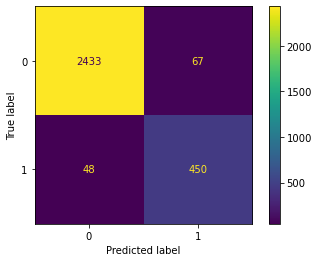

In [75]:
random_forest_auc = confusion_matrix(y_test, y_pred, labels=rf2.classes_)

random_forest_auc_disp = ConfusionMatrixDisplay(confusion_matrix=random_forest_auc,  display_labels=rf2.classes_)
random_forest_auc_disp.plot(values_format='')

###Insights from Random Forest.

Marginal to not great improvements between the other models and removing what may have been overfitting of similar values in the model and can be written off in the results of these Random Forest results.

**Decision tree splits**

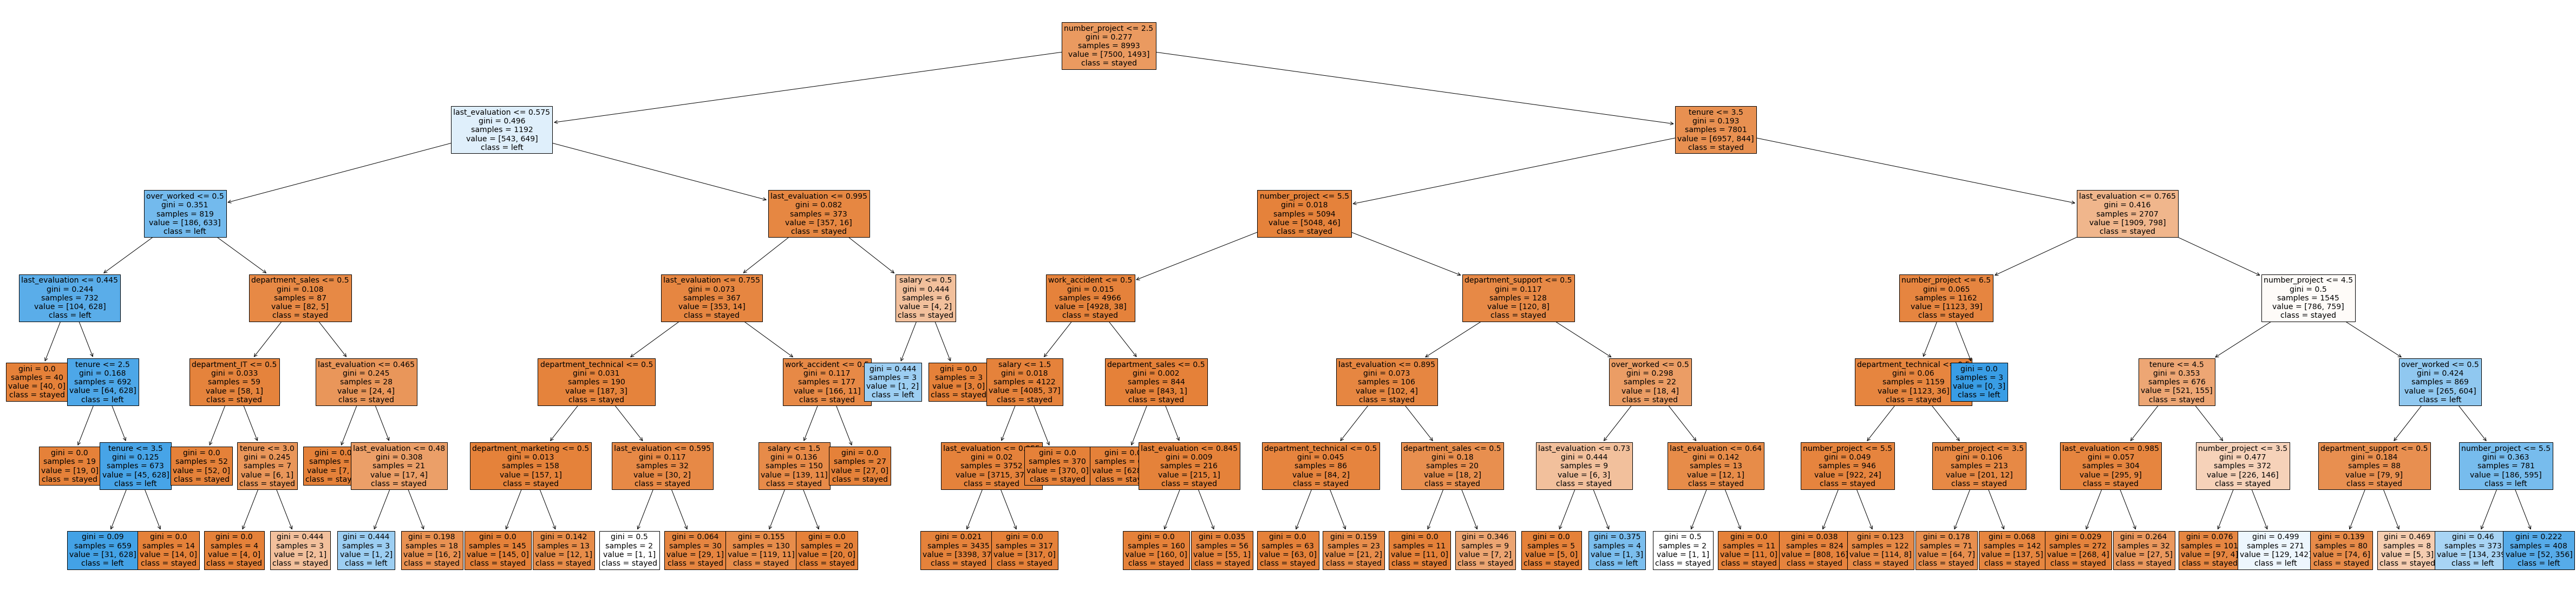

In [79]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [80]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
over_worked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


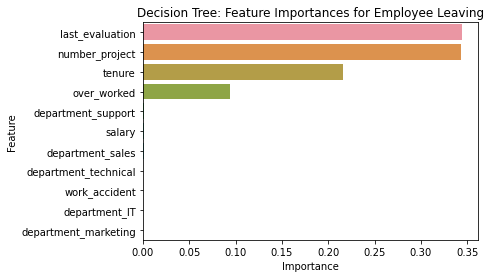

In [81]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The above chart gives the indication of metrics contributing to tenure length at the company. last_evaluation and number_project shows the highest importance levels.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



The key insights is that the number of projects and the last time being evaluated was the highest contributers to employee tenure length. Proposing the number of projects be looked into and compartmentalize this to being fewer and see if this is an approach management has with overloading, or where this plays out the most within the company. The model could be improved with the indication of potential tampering within the scatterplot, and also it could be improved with outliers being handled better and looked into more thoroughly that the two reductions. This could have been improved with correcting potential tampering, increasing the size of the data and then using XGBoost to hyper-tune parameters even though the model has done very well outside of the 95% accuracy in all models tried. The resources that were used was the documentation on sklearn and the kaggle github page that showed how to do Principal Component Analysis. Ethical considerations would be to look at not re-inforcing any biases in the data and presumptions that could be made before the data is shown and within the company I believe looking at management styles that foster peoples interests in more regular evaluations so tenure can be addressed more promptly. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

All models did very well, including Logistic Regression and would be considered a valid model to use. The random forest was the best model with everything but the recall being a higher percentage.

**Decision tree results:** Precision - 0.856693	Recall - 0.903553	F1 - 0.878882	Accuracy - 0.958523	AUC - 0.958675
**Random Forest results:** Precision - 0.866758	Recall - 0.878754	F1 - 0.8867 	Accuracy - 0.961641	AUC - 0.96481

### Conclusion, Recommendations, Next Steps

Past here it could recommend looking into management style, potentially employing more people if the number of projects is becoming too much and looking at what kept the employees that stayed for 5 years or more and see if this can be transposed down onto shorter staying staff (partcularly within sales). Increasing the size of the data if possible and using XGBoost and then also seeing if there was potential tampering as shown within the scatterplot results. Overall the data revealed very good results.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.